In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import cv2

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# 색상 팔레트
colors={
    "purple_1":[120, 58, 221],
    "purple_2":[147, 97, 228],
    "purple_3":[174, 137, 235],
    "purple_4":[201, 176, 241],
    "purple_5":[228, 216, 248]
}

In [3]:

hand_landmarks_dict = {
    0: "WRIST",
    1: "THUMB_CMC",
    2: "THUMB_MCP",
    3: "THUMB_IP",
    4: "THUMB_TIP",
    5: "INDEX_FINGER_MCP",
    6: "INDEX_FINGER_PIP",
    7: "INDEX_FINGER_DIP",
    8: "INDEX_FINGER_TIP",
    9: "MIDDLE_FINGER_MCP",
    10: "MIDDLE_FINGER_PIP",
    11: "MIDDLE_FINGER_DIP",
    12: "MIDDLE_FINGER_TIP",
    13: "RING_FINGER_MCP",
    14: "RING_FINGER_PIP",
    15: "RING_FINGER_DIP",
    16: "RING_FINGER_TIP",
    17: "PINKY_MCP",
    18: "PINKY_PIP",
    19: "PINKY_DIP",
    20: "PINKY_TIP"
}

In [4]:

def get_hand_similarity(target_frame, web_frame, hands):
    target_result = get_hand_landmarks(target_frame, hands)
    web_result = get_hand_landmarks(web_frame, hands)
    
    target_left = target_result.multi_hand_landmarks[:21]
    target_right = target_result.multi_hand_landmarks[21:]
    web_left = web_result.multi_hand_landmarks[:21]
    web_right = web_result.multi_hand_landmarks[21:]
    left_sim = cosine_similarity(target_left,web_left)
    right_sim = cosine_similarity(target_right,web_right)
    
    return left_sim, right_sim

# 손 랜드마크 추출 함수
def get_hand_landmarks(frame, hands):
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(image_rgb)
    if result.multi_hand_landmarks:
        landmarks = []
        for hand_landmarks in result.multi_hand_landmarks:
            for lm in hand_landmarks.landmark:
                landmarks.append([lm.x, lm.y, lm.z])
        return np.array(landmarks)
    return None

# Cosine Similarity 계산 함수
def calculate_similarity(target_landmarks, web_landmarks):    
    if target_landmarks is not None and web_landmarks is not None:
        print("유사도 계산중")
        hand1 = target_landmarks[:21]
        hand2 = web_landmarks[:21]
        # 유사도 계산
        hand1_flat = hand1.flatten().reshape(1, -1)
        hand2_flat = hand2.flatten().reshape(1, -1)
        similarity = cosine_similarity(hand1_flat, hand2_flat)[0][0]
        return similarity
    return 0


### 타겟 비디오의 손 관절 측정


### test code

In [5]:
# 비디오 파일 경로
video_path = "../demo.mp4"  # 여기에 비디오 파일 경로를 입력하세요
cap = cv2.VideoCapture(video_path)

# 첫 번째 프레임 읽기
ret, first_frame = cap.read()
mp_hands = mp.solutions.hands
target_rgb = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)
target_result = mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.7, min_tracking_confidence=0.7).process(target_rgb)

I0000 00:00:1724224638.626919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
target_result.multi_hand_landmarks[0].land

landmark {
  x: 0.73669076
  y: 0.34541988
  z: -2.2716007e-07
}
landmark {
  x: 0.6755811
  y: 0.40099394
  z: -0.0025358044
}
landmark {
  x: 0.62932277
  y: 0.41085404
  z: -0.016943019
}
landmark {
  x: 0.5956663
  y: 0.4317631
  z: -0.03545364
}
landmark {
  x: 0.5700112
  y: 0.47308698
  z: -0.055244006
}
landmark {
  x: 0.59783274
  y: 0.28585857
  z: -0.018038545
}
landmark {
  x: 0.5379142
  y: 0.27988765
  z: -0.04203311
}
landmark {
  x: 0.50342983
  y: 0.26411712
  z: -0.057739023
}
landmark {
  x: 0.47517896
  y: 0.24084064
  z: -0.07010509
}
landmark {
  x: 0.6166684
  y: 0.25366342
  z: -0.03206445
}
landmark {
  x: 0.5701693
  y: 0.35201967
  z: -0.061890777
}
landmark {
  x: 0.6017559
  y: 0.40315735
  z: -0.063413166
}
landmark {
  x: 0.6266854
  y: 0.39843214
  z: -0.06033431
}
landmark {
  x: 0.6402165
  y: 0.25091177
  z: -0.04762047
}
landmark {
  x: 0.60758793
  y: 0.36984456
  z: -0.06865195
}
landmark {
  x: 0.63374716
  y: 0.40054452
  z: -0.053279806
}
landma

In [23]:
[[l.x, l.y, l.z] for l in target_result.multi_hand_landmarks[0].landmark]

[[0.30444955825805664, 0.45080530643463135, -7.121384015817966e-08],
 [0.3384465277194977, 0.3794495463371277, -0.016618303954601288],
 [0.3833870589733124, 0.3324619233608246, -0.02927333489060402],
 [0.4166782796382904, 0.2865681052207947, -0.038279756903648376],
 [0.42884016036987305, 0.23290760815143585, -0.04755684360861778],
 [0.4070990979671478, 0.4306507110595703, -0.04064521938562393],
 [0.4733012914657593, 0.4224329888820648, -0.05395684763789177],
 [0.5125592350959778, 0.42025884985923767, -0.05970015004277229],
 [0.5444183349609375, 0.4189758002758026, -0.06326735764741898],
 [0.41183561086654663, 0.4936160743236542, -0.03468747437000275],
 [0.4661111533641815, 0.45080047845840454, -0.049312181770801544],
 [0.4577603340148926, 0.4182898998260498, -0.04675343260169029],
 [0.441742867231369, 0.40924400091171265, -0.04250340536236763],
 [0.41084909439086914, 0.53336501121521, -0.027458036318421364],
 [0.4545900225639343, 0.4835107624530792, -0.03781901299953461],
 [0.445564270

## mediapipe

In [45]:
def compare_hand(series_a, series_b):
    # frame_num, joint_num, 3(x,y,z)
    sim = 0
    for joint_a, joint_b in zip(series_a, series_b):
        dist, _, _, _ = accelerated_dtw(joint_a, joint_b, dist=euclidean)
        sim += dist
    sim /= len(series_a)
    return sim

In [46]:
frames=30
time_series_a = np.random.rand(frames,21,3)
time_series_b = np.random.rand(frames,21,3)

sim=compare_hand(time_series_a,time_series_b)
print(sim)

NameError: name 'cosine' is not defined

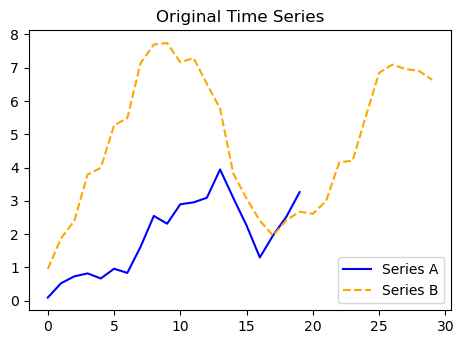

In [36]:
from io import BytesIO
from PIL import Image
from dtw import accelerated_dtw
import os
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# current 3x21
# guide 3x21
# 랜덤 시계열 데이터
np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 + np.sin(np.linspace(0, 3 * np.pi, 30)))

plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()
plt.show()

In [ ]:
dist, _, _, _ = accelerated_dtw(current_frame_landmarks, guide_frame_landmarks, dist=euclidean)

In [29]:
def calculate_similarity(target_landmarks, web_landmarks):    
    if target_landmarks is not None and web_landmarks is not None:
        hand1 = target_landmarks[0]
        hand2 = web_landmarks[0]
        # 유사도 계산
        hand1_flat = hand1.flatten().reshape(1, -1)
        hand2_flat = hand2.flatten().reshape(1, -1)
        similarity = cosine_similarity(hand1_flat, hand2_flat)[0][0]
        return similarity
    return 0

In [27]:
len(landmarks_2)

2

In [31]:
import time

# Mediapipe 손 모델 초기화
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# 색상 및 두께 지정
landmark_drawing_spec = mp_drawing.DrawingSpec(color=colors["purple_2"], thickness=2) 
connection_drawing_spec = mp_drawing.DrawingSpec(color=colors["purple_1"], thickness=2) 


# 비디오 파일 경로
video_path = "../demo.mp4"  # 여기에 비디오 파일 경로를 입력하세요
target_cap = cv2.VideoCapture(video_path)
web_cap = cv2.VideoCapture(0)
web_cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)  # 가로 해상도
web_cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)  # 세로 해상도

# 프레임 속도 설정 (예: 30 FPS)
web_cap.set(cv2.CAP_PROP_FPS, 10)  # 초당 프레임 수
# 첫 번째 프레임 읽기
ret, first_frame = target_cap.read()

start_time = time.time()
while(True):
    with mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:
        while web_cap.isOpened():
            target_ret, target_frame = target_cap.read()
            web_ret, web_frame = web_cap.read()
            if not web_ret:
                break
            if not target_ret:
                break

            # 타겟 손 랜드마크 추출
            target_rgb = cv2.cvtColor(target_frame, cv2.COLOR_BGR2RGB)
            web_rgb = cv2.cvtColor(web_frame, cv2.COLOR_BGR2RGB)
            target_result = hands.process(target_rgb)
            web_result = hands.process(web_rgb)
            
            # 운동 시간 출력   
            current_time = time.time()
            elapsed_time = time.time() - start_time
            
            # 경과 시간을 분:초 형식으로 변환
            hours = int(elapsed_time//3600)
            minutes = int(elapsed_time // 60)
            seconds = int(elapsed_time % 60)
            time_text = f'Time: :{minutes:02}:{seconds:02}'     
            cv2.putText(web_frame, time_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            landmarks_1 = []
            landmarks_2 = []
            # 재활자의 랜드마크 표시
            if web_result.multi_hand_landmarks:
                for web_landmarks in web_result.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(web_frame, web_landmarks, mp_hands.HAND_CONNECTIONS, landmark_drawing_spec, connection_drawing_spec)
                    landmarks_1.append([[l.x, l.y, l.z] for l in web_landmarks.landmark])
                    
            # 타겟 랜드마크 표시
            if target_result.multi_hand_landmarks:
                for target_landmarks in target_result.multi_hand_landmarks:
                    # mp_drawing.draw_landmarks(target_frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                    mp_drawing.draw_landmarks(web_frame, target_landmarks, mp_hands.HAND_CONNECTIONS)
                    landmarks_2.append([[l.x, l.y, l.z] for l in target_landmarks.landmark])
                    
            sim = 0
            if len(landmarks_1)>1 and len(landmarks_2)>1:
                sim = cosine_similarity(landmarks_1, landmarks_2)
            cv2.putText(web_frame, f'Similarity: {sim:.2f}', (400, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            
            # 화면에 프레임 표시
            cv2.imshow('Hand Tracking', web_frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                target_cap.release()
                cv2.destroyAllWindows()
                exit()
    target_cap.release()
cv2.destroyAllWindows()
end_time=time.time()



I0000 00:00:1724225868.189500       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1


ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

### 입력된 비디오의 두손 유사도

In [ ]:
# Mediapipe 손 모델 초기화
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# 비디오 캡처 초기화
target_cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:
    while target_cap.isOpened():
        target_ret, target_frame = target_cap.read()
        if not target_ret:
            break

        # 손 랜드마크 추출
        hand_landmarks = get_hand_landmarks(target_frame, hands)

        # 손 유사도 계산 (두 손이 모두 인식된 경우)
        if hand_landmarks is not None and len(hand_landmarks) == 42:  # 두 손 모두 21개 랜드마크씩 총 42개
            hand1 = hand_landmarks[:21]
            hand2 = hand_landmarks[21:]
            similarity = calculate_similarity(hand1, hand2)
            cv2.putText(target_frame, f'Similarity: {similarity:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # 랜드마크 시각화
        # if hand_landmarks is not None:
        #     for hand_landmark in hand_landmarks.reshape(-1, 21, 3):
        #         mp_drawing.draw_landmarks(frame, mp_hands.HandLandmarkList(landmark=hand_landmark))

        cv2.imshow('Hand Tracking', target_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

target_cap.release()
cv2.destroyAllWindows()

I0000 00:00:1724215070.474400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1
